# Google Colab Example

Tool realizzato da google per eseguire calcoli su una piattaforma di Data Science

Link: <https://colab.research.google.com/notebooks/intro.ipynb>

Si possono scaricare direttamente dei file oppure caricarli da Drive.

Un notebook può essere creato direttamente da Drive

Per utilizzare la GPU -> *Runtime > Change runtime type* (GPU)

Per l'utilizzo delle risorse -> *Runtime > Manage sessions*

Limiti:

- Colab is free to use.
- Colab resources are not guaranteed and not unlimited, and the usage limits sometimes fluctuate
- Notebooks run by connecting to virtual machines that have maximum lifetimes that can be as much as 12 hours. Notebooks will also disconnect from VMs when left idle for too long. Maximum VM lifetime and idle timeout behavior may vary over time, or based on your usage.

Link:
- <https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d>
- <https://colab.research.google.com/notebooks/intro.ipynb>

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
batch_size = 64

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [5]:
class SimpleFullyConnectedNet(nn.Module):
    def __init__(self,input_size, hidden_size, num_classes):
        super(SimpleFullyConnectedNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)          
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print('USE ' + ('cuda' if torch.cuda.is_available() else 'cpu'))

input_size = 28*28
hidden_size = 300
num_classes = 10
batch_size = 100

full_model = SimpleFullyConnectedNet(input_size, hidden_size, num_classes).to(device)

USE cuda


In [ ]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
learning_rate = 0.0005
optimizer = torch.optim.Adam(full_model.parameters(), lr=learning_rate)  


num_epochs = 3

train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(num_epochs + 1)]

In [ ]:
# The number of steps for each epoch, defined by the number of instances divided by the batch size. 
total_step = len(train_loader)

def train(epoch,model,criterion,optimizer,reshape=True):
    for batch_idx, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        if reshape:
            images = images.reshape(-1, 28*28)
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (batch_idx+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch, num_epochs, batch_idx+1, total_step, loss.item()))
        
        train_losses.append(loss.item())
        train_counter.append(
        (batch_idx*batch_size) + ((epoch-1)*len(train_loader.dataset)))
        
def test(model,criterion,reshape=True):
    test_loss = 0
    correct = 0
    
    with torch.no_grad():
        for images, labels in test_loader:
            if reshape:
                images = images.reshape(-1, 28*28)
                
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            
            correct += (predicted == labels).sum().item()
            
            loss = criterion(outputs,labels,)
            
            test_loss += loss.item()
            
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [8]:
test(full_model,criterion)
for epoch in range(1,num_epochs+1):
    train(epoch,full_model,criterion,optimizer)
    test(full_model,criterion)


Test set: Avg. loss: 0.0362, Accuracy: 1133/10000 (11%)

Epoch [1/3], Step [100/938], Loss: 0.4858
Epoch [1/3], Step [200/938], Loss: 0.4414
Epoch [1/3], Step [300/938], Loss: 0.2417
Epoch [1/3], Step [400/938], Loss: 0.3501
Epoch [1/3], Step [500/938], Loss: 0.2262
Epoch [1/3], Step [600/938], Loss: 0.1593
Epoch [1/3], Step [700/938], Loss: 0.3062
Epoch [1/3], Step [800/938], Loss: 0.2916
Epoch [1/3], Step [900/938], Loss: 0.2946

Test set: Avg. loss: 0.0031, Accuracy: 9414/10000 (94%)

Epoch [2/3], Step [100/938], Loss: 0.1495
Epoch [2/3], Step [200/938], Loss: 0.2204
Epoch [2/3], Step [300/938], Loss: 0.2560
Epoch [2/3], Step [400/938], Loss: 0.2981
Epoch [2/3], Step [500/938], Loss: 0.0652
Epoch [2/3], Step [600/938], Loss: 0.2045
Epoch [2/3], Step [700/938], Loss: 0.4136
Epoch [2/3], Step [800/938], Loss: 0.1402
Epoch [2/3], Step [900/938], Loss: 0.1120

Test set: Avg. loss: 0.0023, Accuracy: 9566/10000 (96%)

Epoch [3/3], Step [100/938], Loss: 0.1276
Epoch [3/3], Step [200/938],

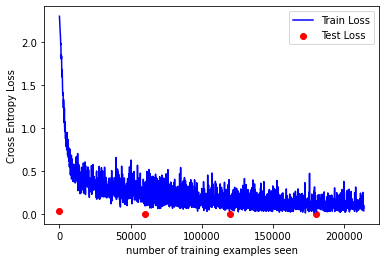

In [10]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('Cross Entropy Loss')
plt.show()


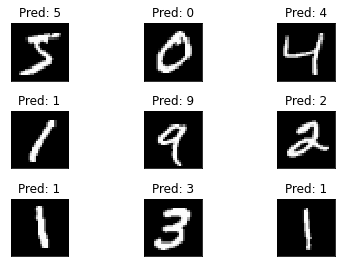

In [11]:
# Predictions
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)


for i in range(9):
  plt.subplot(3,3,i+1)
  
  image, label = train_dataset[i]
  with torch.no_grad():
    output = full_model(image.reshape(-1, 28*28).to(device))
    _, predicted = torch.max(output.data, 1)
    
    
  
  plt.tight_layout()
  plt.imshow(image[0], cmap='gray', interpolation='none')
  plt.title("Pred: {}".format(predicted.item()))
  plt.xticks([])
  plt.yticks([])